## CFG Data 1
# Group 5 project.  
# Reviewing the evolution of blockchain currency 


We will be reviewing cryptocurrency and how this market has evolved. We are going to look at how they have grown over time compared to each other.

# Data Gathering

As this is for educational purposes, we used the yfinance module available in python to interrogate the yahoo finance stock tracker.   
Initialy created datasets spanning 5 years for:
•	Bitcoin
•	Ethereum
•	tether
•	XRP … not blockchain???

5 years was chosen to ensure we have data for all currencies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from scipy.stats import pearsonr
import mplfinance as mpl
import pandas_datareader as pdr
import seaborn as sns

In [2]:
#create variables for yfiance API parameters
start = '2018-01-01'
end = '2021-12-31'
interval = '1d'

In [3]:
#Gather data for crytopcurrencies 

crypto_values= yf.download(['BTC-USD','ETH-USD', 'USDT-USD', 'XRP-USD' ], start = start, end = end, interval = interval )

crypto_values.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                        Close  \
                 BTC-USD     ETH-USD  USDT-USD  XRP-USD       BTC-USD   
Date                                                                    
2018-01-01  13657.200195  772.640991  1.007280  2.39103  13657.200195   
2018-01-02  14982.099609  884.443970  1.004900  2.48090  14982.099609   
2018-01-03  15201.000000  962.719971  1.013440  3.10537  15201.000000   
2018-01-04  15599.200195  980.921997  1.002530  3.19663  15599.200195   
2018-01-05  17429.500000  997.719971  0.998634  3.04871  17429.500000   

                                                   High               ...  \
               ETH-USD  USDT-USD  XRP-USD       BTC-USD      ETH-USD  ...   
Date                                                                  ...   
2018-01-01  772.640991  1.007280  2.39103  14112.200195   782.530029  ...   
2018-01-02  884.443970  1.004900  2.48090  15444.599609   914.830017  ...   
2018-01-03  962.719971  1.013440  3.10537  15572.799805   974.471008  ...   
2018-01-04  980.921997  1.002530  3.19663  15739.700195  1045.079956  ...   
2018-01-05  997.719971  0.998634  3.04871  17705.199219  1075.390015  ...   

                 Low                   Open                                \
            USDT-USD  XRP-USD       BTC-USD     ETH-USD USDT-USD  XRP-USD   
Date                                                                        
2018-01-01  1.001530  2.14897  14112.200195  755.757019  1.01255  2.29602   
2018-01-02  0.993250  2.24793  13625.000000  772.346008  1.00574  2.36948   
2018-01-03  1.002640  2.44315  14978.200195  886.000000  1.00660  2.46410   
2018-01-04  0.993822  3.11734  15270.700195  961.713013  1.01320  3.11734   
2018-01-05  0.985915  2.82561  15477.200195  975.750000  1.00175  3.30081   

                 Volume                                      
                BTC-USD     ETH-USD    USDT-USD     XRP-USD  
Date                                                         
2018-01-01  10291200000  2595760128  1685299968  1894230016  
2018-01-02  16846600192  5783349760  2635859968  3171010048  
2018-01-03  16871900160  5093159936  2471689984  6635879936  
2018-01-04  21783199744  6502859776  3200130048  8103660032  
2018-01-05  23840899072  6683149824  3096620032  6288500224  

[5 rows x 24 columns]

# Checking data 
Although the information is coming from an API and not from an imported CSV, we completed certain checks to see to ensure the data coming in was clean. This involved ensuring datatypes were correct, checking for null values and why they were null.

In [4]:
crypto_values.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-01-01 to 2021-12-31
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BTC-USD)   1461 non-null   float64
 1   (Adj Close, ETH-USD)   1461 non-null   float64
 2   (Adj Close, USDT-USD)  1461 non-null   float64
 3   (Adj Close, XRP-USD)   1461 non-null   float64
 4   (Close, BTC-USD)       1461 non-null   float64
 5   (Close, ETH-USD)       1461 non-null   float64
 6   (Close, USDT-USD)      1461 non-null   float64
 7   (Close, XRP-USD)       1461 non-null   float64
 8   (High, BTC-USD)        1461 non-null   float64
 9   (High, ETH-USD)        1461 non-null   float64
 10  (High, USDT-USD)       1461 non-null   float64
 11  (High, XRP-USD)        1461 non-null   float64
 12  (Low, BTC-USD)         1461 non-null   float64
 13  (Low, ETH-USD)         1461 non-null   float64
 14  (Low, USDT-USD)        1461 non-null  

In [5]:
#get a better understanding of numbers of NaN.
crypto_values.isna().sum()

Adj Close  BTC-USD     0
           ETH-USD     0
           USDT-USD    0
           XRP-USD     0
Close      BTC-USD     0
           ETH-USD     0
           USDT-USD    0
           XRP-USD     0
High       BTC-USD     0
           ETH-USD     0
           USDT-USD    0
           XRP-USD     0
Low        BTC-USD     0
           ETH-USD     0
           USDT-USD    0
           XRP-USD     0
Open       BTC-USD     0
           ETH-USD     0
           USDT-USD    0
           XRP-USD     0
Volume     BTC-USD     0
           ETH-USD     0
           USDT-USD    0
           XRP-USD     0
dtype: int64

No null values

In [6]:
#for anaysis we need just closing values.

## create a close only df to use for plotting

crypt_close = crypto_values['Adj Close']

crypt_close.columns = ['Bitcoin_adj_close','Ethereum_adj_close','Tether_adj_close', 'XRP_adj_close' ]
crypt_close.tail()

,Bitcoin_adj_close,Ethereum_adj_close,Tether_adj_close,XRP_adj_close
Date,,,,
2021-12-27,50640.417969,4037.547607,0.999944,0.926184
2021-12-28,47588.855469,3800.893066,1.001168,0.852960
2021-12-29,46444.710938,3628.531738,1.000294,0.816714
2021-12-30,47178.125000,3713.852051,1.001036,0.839649
2021-12-31,46306.445312,3682.632812,1.000189,0.831163


In [7]:
crypt_close.describe()


,Bitcoin_adj_close,Ethereum_adj_close,Tether_adj_close,XRP_adj_close
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,18375.242011,937.362364,1.001682,0.525413
std,17760.299775,1196.004119,0.005671,0.389689
min,3236.761719,84.308296,0.966644,0.139635
25%,7116.804199,186.843414,0.999995,0.268342
50%,9475.277344,346.522095,1.000815,0.363775
75%,29001.720703,1154.930054,1.003048,0.658777
max,67566.828125,4812.087402,1.053585,3.377810


## How has cryptocurrency evolved
We took the top cryptocurrencies and plotted their values over the last 5 years to get an understanding of how this market has grown. The adjusted close values were used so we had a consistent comparison point.

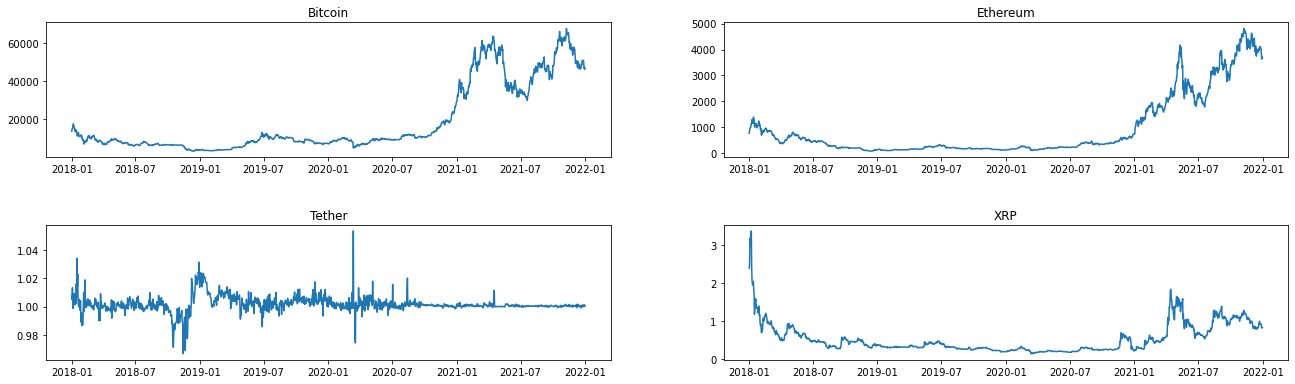

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)


ax1.plot(crypt_close['Bitcoin_adj_close'])
ax1.set_title("Bitcoin")
ax2.plot(crypt_close['Ethereum_adj_close'])
ax2.set_title("Ethereum")
ax3.plot(crypt_close['Tether_adj_close'])
ax3.set_title("Tether")
ax4.plot(crypt_close['XRP_adj_close'])
ax4.set_title("XRP")

plt.subplots_adjust(left = None, right = 3.0, top = 2.0, hspace = 0.5)
plt.show()

Bitcoin and Ethereum have had grown in a similar way particualrly since January 2021 however bitcoins values is significantly higher.  XRP and Tether values are low in comparison and although XRP is starting to show similar growth like Bitci and Etehrium, tethers values seems to be quite volitle up to approx Oct 2020 where it has remained quite level.

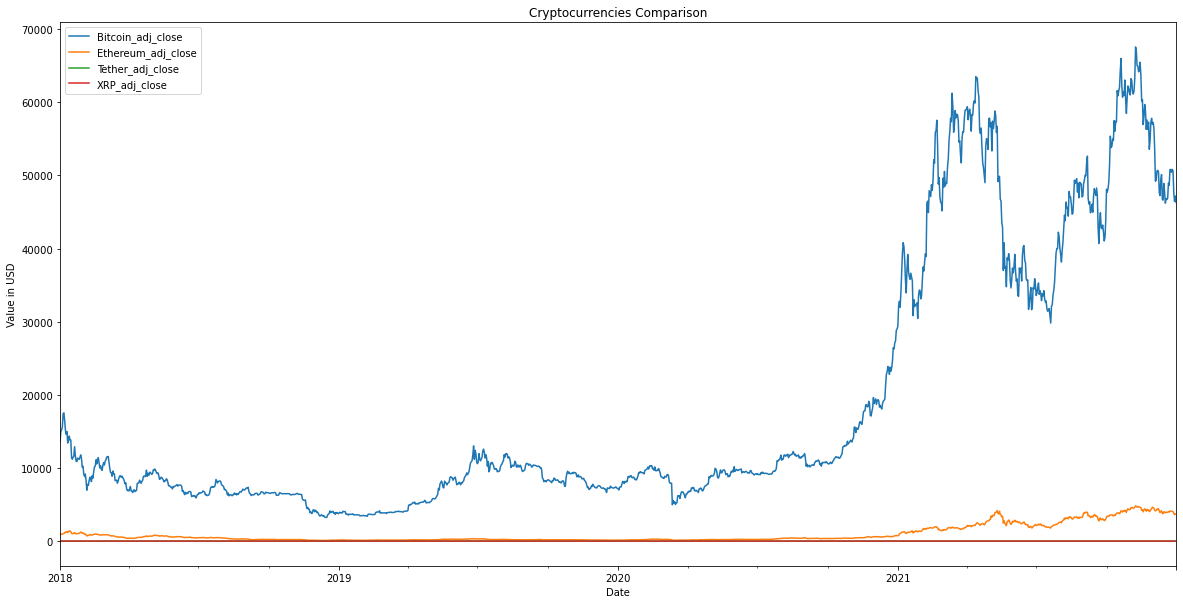

In [9]:
crypt_close.plot(figsize = (20,10))

plt.title('Cryptocurrencies Comparison')
  
# # adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

This chart gives a better incidication of comparitve values.  It is clear that from the four selected cryptocurrencies that Bitcoin is the market leader with Ethereum next.

In [10]:
# comapring volume 

crypt_vol = crypto_values['Volume']



<AxesSubplot:xlabel='Date'>

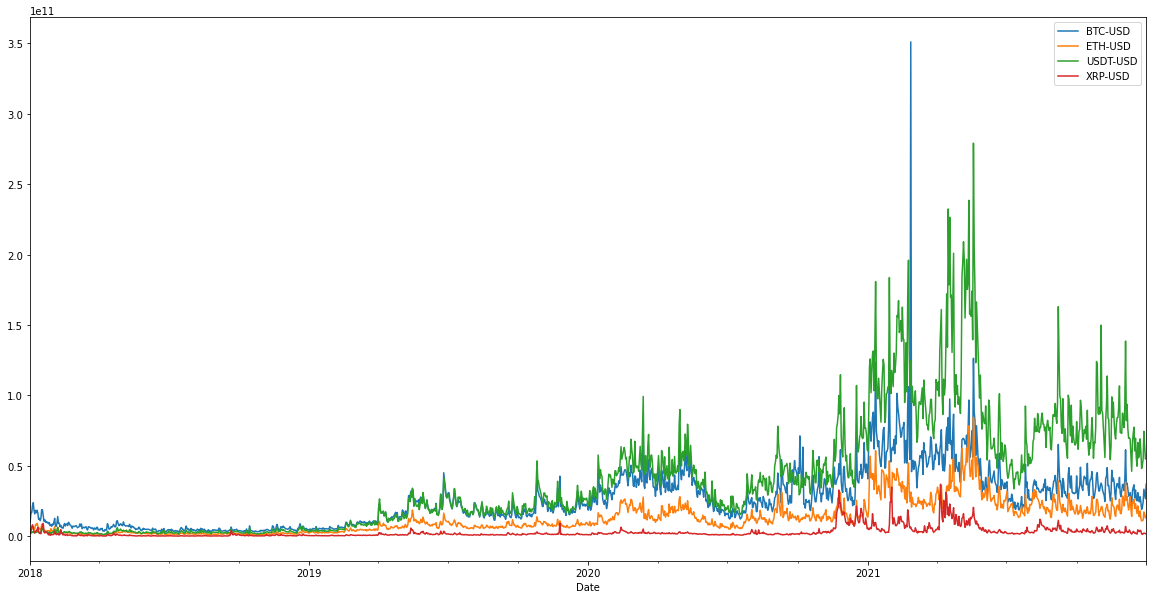

In [11]:
crypt_vol.plot(figsize=(20,10))

Although Tether has a very small market share it's volume of trading is the highest. The volumes for all tend to follow similar patterns with a trading increasing around early 2021.

In [12]:
## PERCENTAGE change
crypto_values_change = crypto_values['Adj Close'].pct_change()
crypto_values_change.head()

,BTC-USD,ETH-USD,USDT-USD,XRP-USD
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,0.097011,0.144702,-0.002363,0.037586
2018-01-03,0.014611,0.088503,0.008498,0.251711
2018-01-04,0.026196,0.018907,-0.010765,0.029388
2018-01-05,0.117333,0.017125,-0.003886,-0.046274


<AxesSubplot:xlabel='Date'>

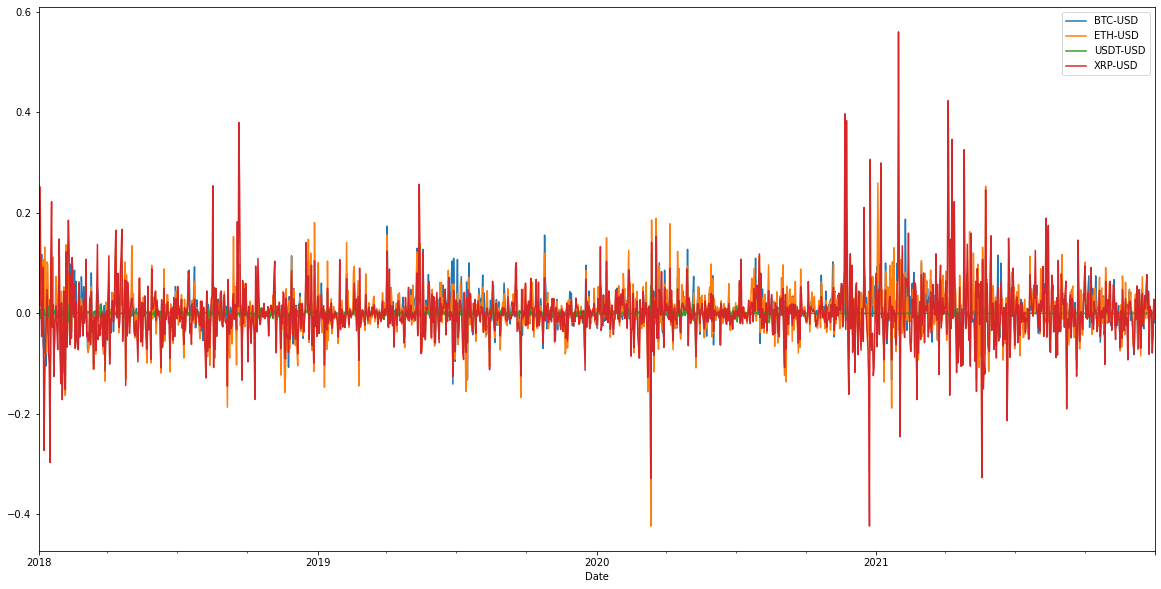

In [13]:
crypto_values_change.plot(figsize=(20,10))


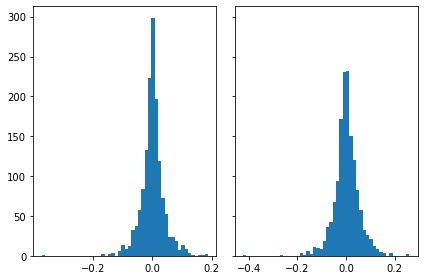

In [14]:
dist1 = crypto_values_change['BTC-USD']
dist2 = crypto_values_change['ETH-USD']
n_bins = 50
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)
plt.show()

https://matplotlib.org/stable/gallery/statistics/hist.html#:~:text=How%20to%20plot%20histograms%20with%20Matplotlib.%20import%20matplotlib.pyplot,Generate%20data%20and%20plot%20a%20simple%20histogram%20%23

There are some outliers here need to try sns boxplot to id outliers and decide on redo?  Need to add titles and labels

The range of pct change is very even between the two cryptocurrencis.  Bitcoin has a higher frequency of small postive percentage changes compared to Ethereum.

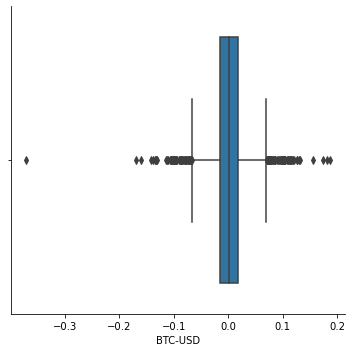

In [15]:
#fig = plt.figure(figsize = (20,10))
#crypto_values_box = crypto_values_change['BTC-USD]

#ax = fig.add_axes([0, 0, 1, 1])
sns.catplot(data=crypto_values_change, x="BTC-USD", kind="box")


In [16]:
## CUMULATIVE RETURNS


In [17]:
## MEAN,sd, 
crypto_values_change.mean()


BTC-USD     0.001636
ETH-USD     0.002405
USDT-USD    0.000005
XRP-USD     0.001241
dtype: float64

In [18]:
crypto_values_change.std()

BTC-USD     0.039620
ETH-USD     0.051113
USDT-USD    0.004396
XRP-USD     0.063444
dtype: float64

In [19]:
#correlettion
crypto_values_change.corr()

,BTC-USD,ETH-USD,USDT-USD,XRP-USD
BTC-USD,1.000000,0.805013,-0.012840,0.591390
ETH-USD,0.805013,1.000000,-0.051615,0.651253
USDT-USD,-0.012840,-0.051615,1.000000,-0.049152
XRP-USD,0.591390,0.651253,-0.049152,1.000000


In [20]:
#covariance - need to look what this is up
crypto_values_change.cov()

,BTC-USD,ETH-USD,USDT-USD,XRP-USD
BTC-USD,0.001570,0.001630,-0.000002,0.001487
ETH-USD,0.001630,0.002613,-0.000012,0.002112
USDT-USD,-0.000002,-0.000012,0.000019,-0.000014
XRP-USD,0.001487,0.002112,-0.000014,0.004025


## How does crytpo compare to other currencies and markets?


Having looked at the growth and volititly of crytpo we have compared these to other curriences and markets to determine if crytpo is more or less stable.  For ease we used bitcoin as it has the largest share as has been around for a longer period.

As we used USD as the comparrison value for crypto we will contunie to do this for other currencies, stocks will be comapred like for like.

In [21]:
curr_comp = yf.download(['BTC-USD','GBPUSD=X','GBPEUR=X', '^FTSE' ], start = start, end = end, interval = interval)
curr_comp.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                         Close  \
                 BTC-USD GBPEUR=X  GBPUSD=X        ^FTSE       BTC-USD   
Date                                                                     
2018-01-01  13657.200195  1.12560  1.351607          NaN  13657.200195   
2018-01-02  14982.099609  1.12470  1.351132  7648.100098  14982.099609   
2018-01-03  15201.000000  1.12687  1.359619  7671.100098  15201.000000   
2018-01-04  15599.200195  1.12491  1.351132  7695.899902  15599.200195   
2018-01-05  17429.500000  1.12284  1.355289  7724.200195  17429.500000   

                                                    High           ...  \
           GBPEUR=X  GBPUSD=X        ^FTSE       BTC-USD GBPEUR=X  ...   
Date                                                               ...   
2018-01-01  1.12560  1.351607          NaN  14112.200195  1.12620  ...   
2018-01-02  1.12470  1.351132  7648.100098  15444.599609  1.12838  ...   
2018-01-03  1.12687  1.359619  7671.100098  15572.799805  1.12996  ...   
2018-01-04  1.12491  1.351132  7695.899902  15739.700195  1.12586  ...   
2018-01-05  1.12284  1.355289  7724.200195  17705.199219  1.12748  ...   

                 Low                       Open                     \
            GBPUSD=X        ^FTSE       BTC-USD GBPEUR=X  GBPUSD=X   
Date                                                                 
2018-01-01  1.348199          NaN  14112.200195  1.12490  1.351607   
2018-01-02  1.350931  7624.100098  13625.000000  1.12477  1.351114   
2018-01-03  1.349874  7640.500000  14978.200195  1.12693  1.359453   
2018-01-04  1.350658  7671.100098  15270.700195  1.12484  1.351169   
2018-01-05  1.352667  7689.799805  15477.200195  1.12291  1.355381   

                              Volume                                 
                  ^FTSE      BTC-USD GBPEUR=X GBPUSD=X        ^FTSE  
Date                                                                 
2018-01-01          NaN  10291200000      0.0      0.0          NaN  
2018-01-02  7687.799805  16846600192      0.0      0.0  576251800.0  
2018-01-03  7648.100098  16871900160      0.0      0.0  571662800.0  
2018-01-04  7671.100098  21783199744      0.0      0.0  705864000.0  
2018-01-05  7695.899902  23840899072      0.0      0.0  636035700.0  

[5 rows x 24 columns]

In [22]:
#creating variable with closig values

comp_close = curr_comp['Adj Close']
comp_close.head(1)

,BTC-USD,GBPEUR=X,GBPUSD=X,^FTSE
Date,,,,
2018-01-01,13657.200195,1.1256,1.351607,NaN


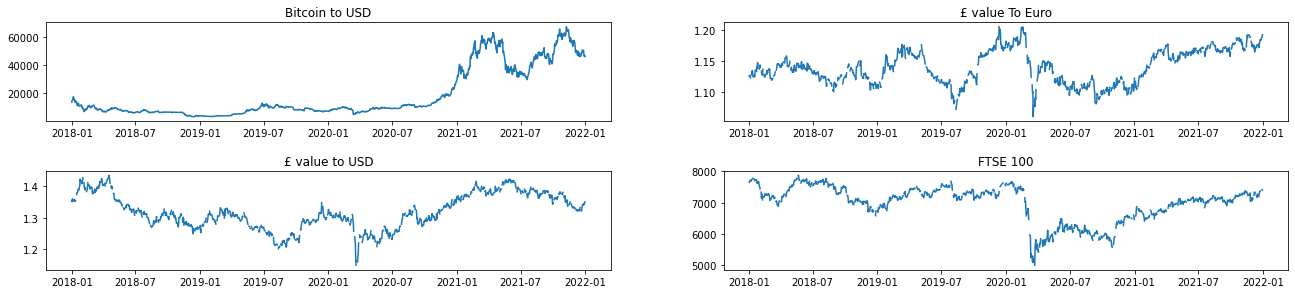

In [23]:
fig = plt.figure()


ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

ax1.plot(comp_close['BTC-USD'])
ax1.set_title("Bitcoin to USD")
ax2.plot(comp_close['GBPEUR=X'])
ax2.set_title("£ value To Euro")
ax3.plot(comp_close['GBPUSD=X'])
ax3.set_title("£ value to USD")
ax4.plot(comp_close['^FTSE'])
ax4.set_title("FTSE 100")


plt.subplots_adjust(left = None, right = 3.0, top = 1.5, hspace = 0.5)
plt.show()

In [ ]:
curr_comp['Close'].plot(figsize = (20,10))

plt.title('Crytpo Vs Other currencies')
  
# # adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
#plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

In [ ]:
comp_close.corr()

All are showing growth from around Mar 2020 however cyrptocurrency shows the strongest growth compared to other currecies and stocks.  There is a weak correlation between cryptocurrency and GDP and EUR however there is a negative correlation between crypto and the FTSE 100.

In [ ]:
curr_comp_vol = curr_comp['Volume']
curr_comp_vol.head()

curr_comp_vol.plot(figsize=(20,10))

There are no volume figures for GDP and EUr hoever the tradng volume for bitcoin compared to FTSE is significantly higher.  Volume are the amount of units traded per day and shows how boyant th marke is suggesting crypto is significantly more boyant than stock market. 

In [ ]:
comp_close = curr_comp['Adj Close'].pct_change()
comp_close


In [ ]:
# calcu percentage return
curr_comp_returns = curr_comp['Close'].pct_change()



In [ ]:
curr_comp_returns.plot(figsize=(20,10))

In [ ]:
# plt.hist(curr_comp_returns['BTC-USD'] , bins = 50 , alpha = 0.75)
# #plt.hist(curr_comp_returns['GBPUSD=X'] , bins = 50 , alpha = 0.75)






# plt.legend(['Bitcoin'])
# #plt.legend(['GBP'])
# plt.show()

fig = plt.figure()


ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

ax1.hist(curr_comp_returns['BTC-USD'])
ax1.set_title("Bitcoin to USD")
ax1.set_ylabel ('Total')
ax1.set_xlabel ('Percentage Change')
ax2.hist(curr_comp_returns['GBPEUR=X'])
ax2.set_title("£ value To Euro")
ax2.set_ylabel ('Total')
ax2.set_xlabel ('Percentage Change')
ax3.hist(curr_comp_returns['GBPUSD=X'])
ax3.set_title("£ value to USD")
ax3.set_ylabel ('Total')
ax3.set_xlabel ('Percentage Change')
ax4.hist(curr_comp_returns['^FTSE'])
ax4.set_title("FTSE 100")
ax4.set_ylabel ('Total')
ax4.set_xlabel ('Percentage Change')


plt.subplots_adjust(left = None, right = 3.0, top = 5.0, hspace = 0.5)
plt.show()

In [ ]:
comp_close.describe()

## NEED TO FIGURE OUT BIN SIZE HERE AS IS DIFFERENT FROM PREVIOUS

The range of percentage change for cryptocurrencies is significantly higher than the other currencies and stocks.  The range for crypto goes between -0.37 to 0.18.  For GDP the range is from -0.03 to 0.017, for FTSE 100 -0.11 to 0.09